In [1]:
suppressMessages({
  options(stringsAsFactors = FALSE)
  library(dplyr)
  library(readr)
  library(ggplot2)
  library(ggsci)
  library(ggpubr)
  library(RColorBrewer)
  library(scales)
})

In [ ]:
mytheme <- ggplot2::theme(
  plot.background = element_blank(),
  panel.background = element_rect(fill = "#FFFFFF"),
  legend.background = element_blank(),
  legend.box.background = element_blank(),
  panel.border = element_rect(linetype = "solid", colour = "black", fill = NA, size = 0.5),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  axis.line = element_blank()
)

dimplot_theme <- mytheme + theme(
  legend.text = element_text(size = 20), plot.title = element_blank(),
  axis.text = element_blank(), axis.ticks = element_blank(), aspect.ratio = 1
)

featureplot_theme <- mytheme + theme(
  panel.grid.major = element_blank(),
  axis.text = element_blank(), axis.ticks = element_blank(), axis.title = element_blank(), aspect.ratio = 1
)

color <- c(c(pal_d3("category20")(20), "#B52D73", "#4347B5", "#4FED28", "#402727", "#48959C", "#FC6262", "#4A9EFF", "#9E969E"))
# specify colors
data_color <- c("#197EC0FF", "#ff8000")
tissue_color <- c("#2CA02CFF", "#E377C2FF")
celltype1_color <- c("#0072B5FF", "#D62728FF") # c(pal_nejm("default")(8)[c(2,1)])
celltype2_color <- c("#9467BDFF", "#FF95A8FF", "#8AA600", "#46732EFF", "#197EC0FF", "#D62728FF")
celltype3_color <- c("#9467BDFF", "#FF95A8FF", "#8AA600", "#46732EFF", "#197EC0FF", "#D62728FF", "#ff7f00", "#ffff33", "#8A9197FF")
celltype4_color <- c("#20854EFF", "#008EA0FF", "#FF6F00FF", "#C71000FF")

patient_color <- c(
  "#FED439FF", "#8A9197FF", "#8A4198FF", "#D5E4A2FF", "#197EC0FF", "#FD7446FF", "#46732EFF", "#71D0F5FF", "#E377C2FF",
  "#075149FF", "#e60000", "#91331FFF", "#1A9993FF", "#ff80aa", "#D2AF81FF", "#370335FF", "#cc99ff", "#ff8000", "#59b300"
)

# AS analysis

## s01_generateEvents

In [ ]:
# SHELL
# conda activate suppa
# s01_generateEvents
# suppa.py generateEvents -b S -i ../00_ID_name_reverse.gtf -o CRC_HTCRC -f ioe -e SE SS MX RI FL

In [217]:
setwd("/gpfs1/tangfuchou_pkuhpc/tangfuchou_cls/luping/project/ont_iso_crc/2_RNA_CRC/01_RNA_analysis/CRC_HTCRC_11_AS/CRC_HTCRC_01_AS_suppa_each_patient/s01_generateEvents")

In [94]:
AS_list <- list()
AS_list[["SE"]] <- paste0("coord_", c(1:4))
AS_list[["MX"]] <- paste0("coord_", c(1:8))
AS_list[["A5"]] <- paste0("coord_", c(1:4))
AS_list[["A3"]] <- paste0("coord_", c(1:4))
AS_list[["RI"]] <- paste0("coord_", c(1:4))
AS_list[["AF"]] <- paste0("coord_", c(1:6))
AS_list[["AL"]] <- paste0("coord_", c(1:6))

In [95]:
# Merge all types of AS events
for (AS in names(AS_list)) {
  in_ioe <- read.table(file = sprintf("CRC_HTCRC_%s_strict.ioe", AS), header = T, sep = "\t")
  if (AS == "SE") {
    crc_ioe <- in_ioe
  } else {
    crc_ioe <- rbind(crc_ioe, in_ioe)
  }
}
write.table(crc_ioe, file = "CRC_HTCRC_all_strict.ioe", quote = F, row.names = F, sep = "\t")

## s02_psiPerEvent

In [218]:
setwd("/gpfs1/tangfuchou_pkuhpc/tangfuchou_cls/luping/project/ont_iso_crc/2_RNA_CRC/01_RNA_analysis/CRC_HTCRC_11_AS/CRC_HTCRC_01_AS_suppa_each_patient")

In [ ]:
ont <- readRDS(file = "../../../CRC_HTCRC_02_RNA_seurat/CRC_HTCRC_01_RNA_5400_3262_tx/00_tx_5400_3262_hvg1869_PC1_20.rds")
meta <- ont@meta.data

In [ ]:
tpm <- read_csv("../../../CRC_HTCRC_01_RNA_QC/00_tx_tpm_qc_500_genenumbersgt0_5400_3262.csv")
tpm <- as.data.frame(tpm)
rownames(tpm) <- tpm[, 1]
tpm <- tpm[, 2:ncol(tpm)]
dim(tpm)
head(tpm, 2)

In [91]:
for (mypatient in names(table(meta$patient))) {
  print(mypatient)

  if (mypatient %in% names(table(meta$patient))[1:9]) {
    ne_cells <- rownames(meta[which(meta$data %in% "CRC" & meta$celltype3 %in% "Stem/TA"), ]) # all normal cells from CRC data
  } else {
    ne_cells <- rownames(meta[which(meta$data %in% "HTCRC" & meta$celltype3 %in% "Stem/TA"), ]) # all normal cells from HTCRC data
  }
  cc_cells <- rownames(meta[which(meta$patient %in% mypatient & meta$celltype3 %in% "Stem/TA-like"), ])

  # expression file in TPM units
  write.table(tpm[, c(ne_cells, cc_cells)], file = sprintf("%s_02_psiPerEvent_tx_tpm.txt", mypatient), quote = FALSE, sep = "\t")
  write.table(tpm[, ne_cells], file = sprintf("%s_02_psiPerEvent_tx_tpm_NE.txt", mypatient), quote = FALSE, sep = "\t")
  write.table(tpm[, cc_cells], file = sprintf("%s_02_psiPerEvent_tx_tpm_CC.txt", mypatient), quote = FALSE, sep = "\t")
}

[1] "CRC01"
[1] "CRC02"
[1] "CRC03"
[1] "CRC04"
[1] "CRC05"
[1] "CRC07"
[1] "CRC08"
[1] "CRC09"
[1] "CRC10"
[1] "HTCRC01"
[1] "HTCRC04"
[1] "HTCRC05"


In [104]:
# SHELL
file_comm <- file("s02_psiPerEvent.sh", open = "w")
for (mypatient in names(table(meta$patient))) {
  writeLines(
    sprintf("suppa.py psiPerEvent --ioe-file s01_generateEvents/CRC_HTCRC_all_strict.ioe --expression-file %s_02_psiPerEvent_tx_tpm.txt -o %s_02_psiPerEvent_strict", mypatient, mypatient),
    file_comm
  )
}
close(file_comm)

In [ ]:
for (mypatient in names(table(meta$patient))) {
  # print(mypatient)

  if (mypatient %in% names(table(meta$patient))[1:9]) {
    ne_cells <- rownames(meta[which(meta$data %in% "CRC" & meta$celltype3 %in% "Stem/TA"), ]) # all normal cells from CRC data
  } else {
    ne_cells <- rownames(meta[which(meta$data %in% "HTCRC" & meta$celltype3 %in% "Stem/TA"), ]) # all normal cells from HTCRC data
  }
  cc_cells <- rownames(meta[which(meta$patient %in% mypatient & meta$celltype3 %in% "Stem/TA-like"), ])

  in_psi <- read.table(file = sprintf("%s_02_psiPerEvent_strict.psi", mypatient), header = TRUE, sep = "\t")
  write.table(in_psi[, ne_cells], file = sprintf("%s_02_psiPerEvent_strict_NE.psi", mypatient), quote = FALSE, sep = "\t")
  write.table(in_psi[, cc_cells], file = sprintf("%s_02_psiPerEvent_strict_CC.psi", mypatient), quote = FALSE, sep = "\t")
}

## s03_diffSplice

In [103]:
file_comm <- file("s03_diffSplice.sh", open = "w")
for (mypatient in names(table(meta$patient))) {
  writeLines(
    sprintf("suppa.py diffSplice --method classical --input s01_generateEvents/CRC_HTCRC_all_strict.ioe --psi %s_02_psiPerEvent_strict_NE.psi %s_02_psiPerEvent_strict_CC.psi --tpm %s_02_psiPerEvent_tx_tpm_NE.txt %s_02_psiPerEvent_tx_tpm_CC.txt -nan 0.5 -gc -o %s_03_diffSplice", mypatient, mypatient, mypatient, mypatient, mypatient),
    file_comm
  )
}
close(file_comm)

## s04_filter

In [ ]:
for (mypatient in names(table(meta$patient))) {
  ioe <- read.table(file = "s01_generateEvents/CRC_HTCRC_all_strict.ioe", header = T, sep = "\t")
  dpsi <- read.table(file = sprintf("%s_03_diffSplice.dpsi", mypatient), header = T, sep = "\t")
  dpsi$event_id <- rownames(dpsi)
  colnames(dpsi) <- c("dPSI", "pval", "event_id")
  df_merge <- merge(dpsi, ioe, by = "event_id")
  df_merge$AS <- sapply(strsplit(sapply(strsplit(df_merge$event_id, split = ";"), function(x) {
    x[2]
  }), split = ":"), function(x) {
    x[1]
  })
  rownames(df_merge) <- df_merge$event_id

  diff_as <- df_merge %>%
    na.omit() %>%
    filter(pval < 0.05, abs(dPSI) > 0.1)
  dim(diff_as)
  write.table(diff_as, file = sprintf("%s_04_filter_diff_AS.txt", mypatient), quote = F, sep = "\t")
}

In [228]:
## export the differential AS data (as extended data)

In [435]:
for (mypatient in names(table(ont@meta.data$patient))) {
  diff_as <- read.table(file = sprintf("%s_04_filter_diff_AS.txt", mypatient), header = T, sep = "\t", row.names = 1)
  diff_as$patient <- mypatient
  if (mypatient %in% "CRC01") {
    diff_as_all <- diff_as
  } else {
    diff_as_all <- rbind(diff_as_all, diff_as)
  }
}
write.table(diff_as_all, file = "04_filter_diff_AS_each_patient_rbind.txt", sep = "\t", quote = F, row.names = F)

In [436]:
dim(diff_as_all)
length(unique(diff_as_all$event_id))

[1] 2293    9

[1] 889

In [437]:
AS_type <- rev(c("A3", "A5", "AF", "AL", "MX", "RI", "SE"))
AS_color <- rev(c("#80b1d3", "#fdb462", "#ffffb3", "#8dd3c7", "#b3de69", "#fb8072", "#bebada"))

In [438]:
diff_as_all$AS <- factor(diff_as_all$AS, levels = AS_type)

### AS distribution

Saving 6.67 x 3.7 in image


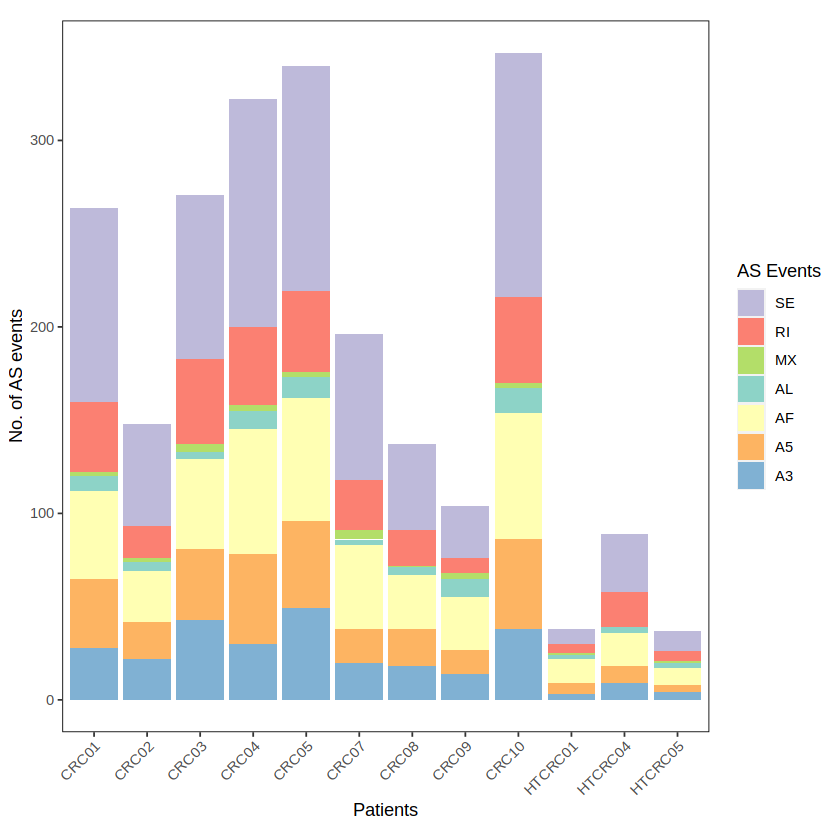

In [450]:
as_distribution <- as.data.frame(table(diff_as_all$AS, diff_as_all$patient))
as_distribution$Var1 <- factor(as_distribution$Var1, levels = AS_type)

ggplot(as_distribution, aes(x = Var2, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  labs(x = "Patients", y = "No. of AS events", fill = "AS Events") +
  scale_fill_manual(values = AS_color) +
  mytheme +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), aspect.ratio = 1.1)
ggsave(file = "04_filter_diff_AS_each_patient_AS_distribution_1.pdf", height = 3.7)

In [451]:
as_distribution_1 <- as.data.frame(table(
  diff_as_all[which(diff_as_all$dPSI > 0), ]$AS,
  diff_as_all[which(diff_as_all$dPSI > 0), ]$patient
))
as_distribution_1$dPSI <- "> 0"
as_distribution_2 <- as.data.frame(table(
  diff_as_all[which(diff_as_all$dPSI < 0), ]$AS,
  diff_as_all[which(diff_as_all$dPSI < 0), ]$patient
))
as_distribution_2$dPSI <- "< 0"
as_distribution_2$Freq <- -as_distribution_2$Freq
as_distribution <- rbind(as_distribution_1, as_distribution_2)

as_distribution$Var1 <- factor(as_distribution$Var1, levels = AS_type)

In [452]:
as_distribution <- as_distribution %>%
  group_by(Var2) %>%
  mutate(Freq_proportion = Freq / sum(abs(Freq)))

Saving 6.67 x 3.7 in image


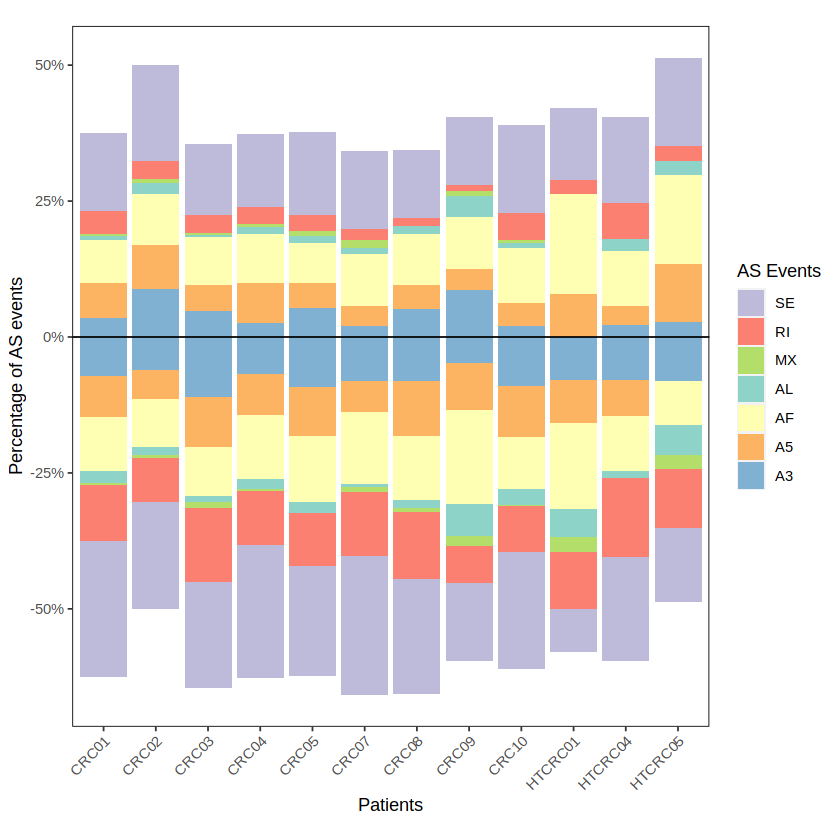

In [455]:
ggplot(as_distribution, aes(x = Var2, y = Freq_proportion, fill = Var1)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = 0.5) +
  scale_y_continuous(labels = scales::percent) + # 自动处理正负堆叠
  labs(x = "Patients", y = "Percentage of AS events", fill = "AS Events") +
  scale_fill_manual(values = AS_color) +
  mytheme +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), aspect.ratio = 1.1)
ggsave(file = "04_filter_diff_AS_each_patient_AS_distribution_2.pdf", height = 3.7)

### GO

#### At least detected in 3 patients

In [268]:
example_diff_as <- diff_as_all %>%
  group_by(event_id) %>%
  mutate(n_patient = length(patient)) %>%
  arrange(desc(n_patient), event_id)
write.table(example_diff_as,
  file = "04_filter_diff_AS_each_patient_rbind_used_for_select_example.txt", sep = "\t", quote = F, row.names = F
)

In [279]:
write.table(
  unique((example_diff_as %>% filter(n_patient >= 3))$gene_id),
  file = "04_filter_diff_AS_each_patient_rbind_278_ASgenes_more3patients.txt", row.names = F, col.names = F, quote = F
)

In [280]:
go_term <- read.csv(file = "04_filter_diff_AS_each_patient_rbind_278_ASgenes_more3patients_GO/Enrichment_GO/GO_membership_parent.csv", header = T, check.names = F)
go <- read.csv(file = "04_filter_diff_AS_each_patient_rbind_278_ASgenes_more3patients_GO/Enrichment_GO/GO_AllLists.csv", header = T, check.names = F) %>%
  filter(Description %in% substring(go_term$CHILD_GO_MyLis, 12))
go <- go[order(-go$LogP), ]
go$Description <- factor(go$Description, levels = go$Description)

In [290]:
write.table(go, file = "04_filter_diff_AS_each_patient_rbind_278_ASgenes_more3patients_GO.txt", sep = "\t", quote = F, row.names = F)

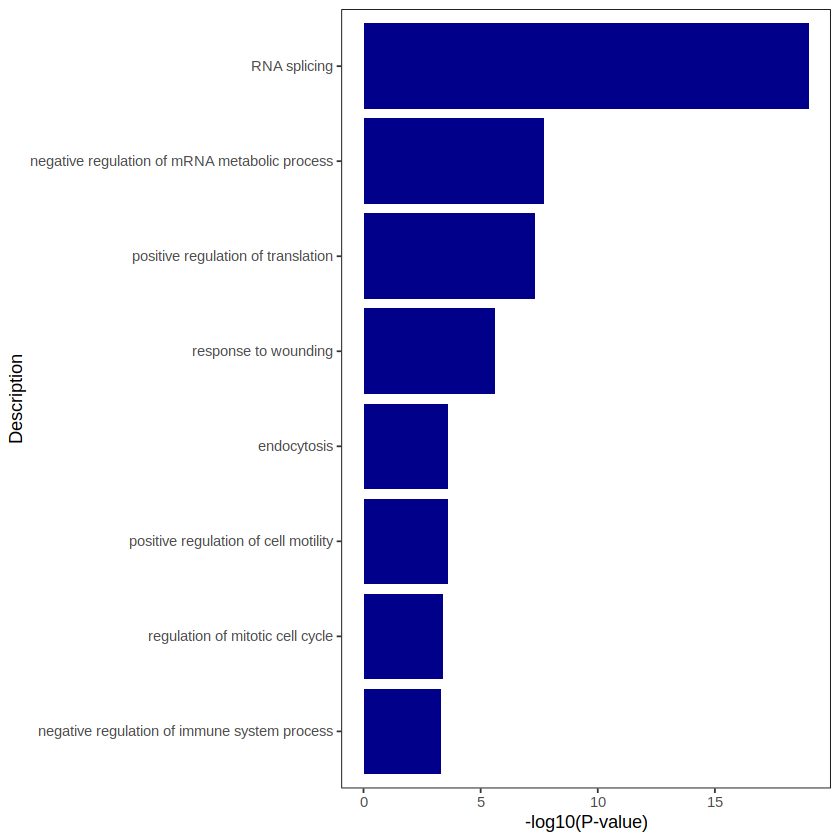

In [471]:
go <- go %>% filter(Description %in% c(
  "RNA splicing", "negative regulation of mRNA metabolic process", "positive regulation of translation", "response to wounding", "endocytosis", "positive regulation of cell motility",
  "regulation of mitotic cell cycle", "negative regulation of immune system process"
))
ggplot(go, aes(x = -LogP, y = Description)) +
  geom_bar(stat = "identity", fill = "darkblue") +
  scale_fill_manual(values = rev(c("darkgreen", "purple"))) +
  mytheme +
  labs(x = "-log10(P-value)")
ggsave(file = "04_filter_diff_AS_each_patient_rbind_278_ASgenes_more3patients_GO.pdf", height = 2, width = 5)

#### example

In [ ]:
go_list <- strsplit(go$Hits, split = "\\|")
names(go_list) <- go$Description

go_genes <- data.frame(
  Description = character(),
  gene_id = character(),
  stringsAsFactors = FALSE
)

for (description in names(go_list)) {
  genes <- go_list[[description]]
  temp_df <- data.frame(
    Description = description,
    gene_id = genes,
    stringsAsFactors = FALSE
  )
  go_genes <- rbind(go_genes, temp_df)
}

In [ ]:
# Top 20 AS events of each patient
test_candidate <- example_diff_as %>%
  group_by(patient) %>%
  slice_min(order_by = -abs(dPSI), n = 20) %>%
  arrange(-n_patient) %>%
  as.data.frame()
test_candidate <- merge(go_genes, test_candidate, by = "gene_id") %>% arrange(-n_patient, event_id)

In [611]:
write.table(test_candidate,
  file = "04_filter_diff_AS_each_patient_rbind_used_for_select_example_with_top20ASgenes_GOgenes_candidates.txt",
  sep = "\t", quote = F, row.names = F
)

### Volcano plot

In [302]:
library(ggrepel)


 SE  RI  MX  AL  AF  A5  A3 
104  38   2   8  47  37  28 


SE RI MX AL AF A5 A3 
 6  4  0  0  5  4  1 

[1] 1e-10

Saving 6.67 x 3.5 in image


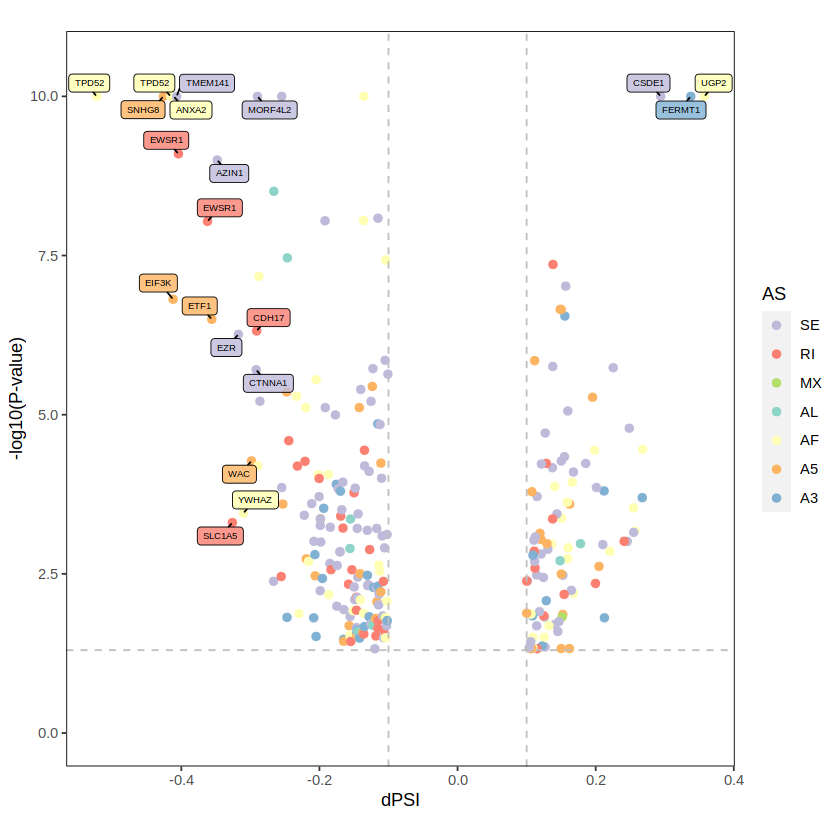

In [552]:
test <- diff_as_all %>%
  filter(patient %in% "CRC01") %>%
  arrange(-abs(dPSI))
test$AS <- factor(test$AS, levels = AS_type)
table(test$AS)
table((test %>% head(n = 20))$AS)

sort(unique(test$pval))[2]
test[which(test$pval == 0), ]$pval <- sort(unique(test$pval))[2]

ggplot(data = test, aes(x = dPSI, y = -log10(pval), color = AS)) +
  geom_point(size = 2) +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "gray", linewidth = 0.5) +
  geom_vline(xintercept = 0.1, linetype = "dashed", color = "gray", linewidth = 0.5) +
  geom_vline(xintercept = -0.1, linetype = "dashed", color = "gray", linewidth = 0.5) +
  labs(x = "dPSI", y = "-log10(P-value)") +
  theme(aspect.ratio = 1.1) +
  geom_label_repel(
    data = test %>% head(n = 20),
    aes(x = dPSI, y = -log10(pval), label = gene_id, fill = AS), color = "black",
    min.segment.length = unit(0, "lines"),
    max.overlaps = 20, size = 2, box.padding = 0.1, show.legend = FALSE
  ) +
  scale_color_manual(values = AS_color, na.value = "lightgray") +
  scale_fill_manual(values = alpha(AS_color[c(1, 2, 5, 6, 7)], 0.8), na.value = "lightgray") +
  mytheme +
  ylim(0, 10.5)
ggsave(filename = "04_filter_diff_AS_each_patient_CRC01.pdf", height = 3.5)

# Upset

In [111]:
library(ComplexUpset)

In [220]:
as_list <- list()

for (mypatient in names(table(ont@meta.data$patient))) {
  diff_as <- read.table(file = sprintf("%s_04_filter_diff_AS.txt", mypatient), header = T, sep = "\t", row.names = 1)
  as_list[[mypatient]] <- diff_as$event_id
}

In [221]:
all_events <- unique(unlist(as_list))

In [223]:
length(all_events)

[1] 889

In [224]:
all_events <- unique(unlist(as_list))

# Create a binary matrix
df_as_binary <- as.data.frame(sapply(as_list, function(events) {
  as.numeric(all_events %in% events)
}))
rownames(df_as_binary) <- all_events

In [225]:
df_as_binary$event_id <- rownames(df_as_binary)
df_as_binary$AS <- sapply(strsplit(df_as_binary$event_id, split = ";|:"), function(x) {
  x[2]
})
df_as_binary$AS <- factor(df_as_binary$AS, levels = c("SE", "RI", "A5", "A3", "AF", "AL", "MX"))

In [170]:
AS_color <- c("#bebada", "#fb8072", "#fdb462", "#80b1d3", "#b3de69", "#ffffb3", "#8dd3c7")
names(AS_color) <- c("SE", "RI", "A5", "A3", "AF", "AL", "MX")

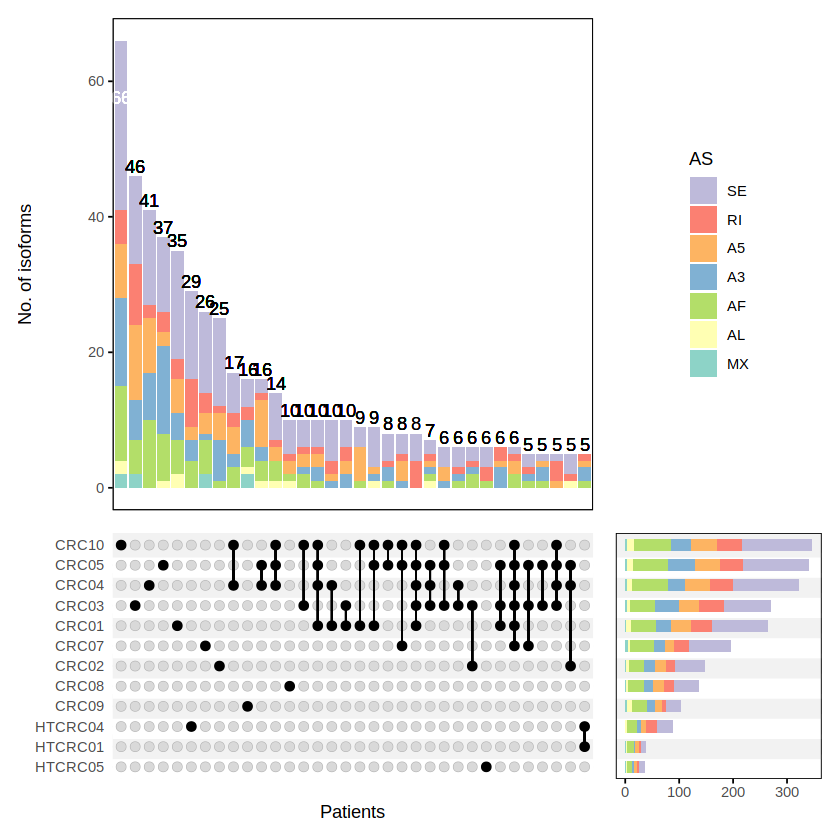

In [236]:
# pdf(file="Diff_AS_upset.pdf", width = 7, height = 5)
upset(
  df_as_binary,
  names(table(meta$patient)),
  name = "Patients",
  width_ratio = 0.3,
  n_intersections = 34,
  set_sizes = (
    upset_set_size(mapping = aes(fill = AS), position = "right") +
      labs(y = "No. of AS events per patient") + mytheme +
      theme(axis.title.x = element_blank(), axis.ticks.x = element_line(color = "black"), legend.position = "none")
  ),
  base_annotations = list(
    "No. of isoforms" = intersection_size(
      counts = TRUE,
      mapping = aes(fill = AS)
    ) + scale_fill_manual(values = AS_color) + mytheme + theme(axis.ticks.y = element_line(color = "black")) #+Nolend()
  ),
  matrix = intersection_matrix(
    geom = geom_point(size = 2)
  ),
  guides = "over"
) + scale_fill_manual(values = AS_color) + mytheme
# dev.off()

In [ ]:
for (mypatient in names(table(meta$patient))) {
  diff_as <- read.table(file = sprintf("%s_04_filter_diff_AS.txt", mypatient), header = T, sep = "\t", row.names = 1)
  print(sort(table(diff_as$AS)))
}

# Partial correlation between SFs and AS

In [4]:
suppressMessages({
  library(ppcor)
  library(Seurat)
  library(dplyr)
  library(pheatmap)
  library(bcv)
  library(ggplot2)
})

In [637]:
setwd("/gpfs1/tangfuchou_pkuhpc/tangfuchou_cls/luping/project/ont_iso_crc/2_RNA_CRC/01_RNA_analysis/CRC_HTCRC_11_AS/CRC_HTCRC_01_AS_suppa_each_patient/cor_sf_and_as")

In [7]:
ont <- readRDS(file = "../../../CRC_HTCRC_02_RNA_seurat/CRC_HTCRC_01_RNA_5400_3262_tx/00_tx_5400_3262_hvg1869_PC1_20.rds")
DefaultAssay(ont) <- "GENE"

In [8]:
marker <- read.csv(file = "../../../marker/CRC_import_geneset_V1.csv", header = T)
marker_sf <- marker[!is.na(marker$SF), ]$GeneName
length(marker_sf)

[1] 245

In [9]:
gene_tpm <- read.csv(file = "../../../CRC_HTCRC_01_RNA_QC/00_gene_tpm_qc_500_genenumbersgt0_5400_3262.csv", header = T, row.names = 1)

In [ ]:
as_list <- list()
psi_imput_list <- list()
mysub_list <- list()
deg_list <- list()
deg_sf_list <- list()
tpm_sf_log1p_list <- list()
df_cor_pearson_list <- list()

for (mypatient in names(table(ont@meta.data$patient))) {
  print(mypatient)
  # load differential AS
  as_p <- read.table(file = sprintf("../%s_04_filter_diff_AS.txt", mypatient), header = T, sep = "\t", row.names = 1)
  as_list[[mypatient]] <- as_p

  # Correct the PSI of AS according to the differences in positive and negative chains
  as_p$strand <- sapply(strsplit(rownames(as_p), split = ":"), function(x) {
    x[length(x)]
  })
  # The AS that needs to be changed to (1-PSI) are: the negative chain of AL, the negative chain of AF, and the negative chain of MX
  as_correct <- rownames(as_p[which(as_p$AS %in% c("AL", "AF", "MX") & as_p$strand %in% "-"), ])
  # length(as_correct)
  as_not_correct <- rownames(as_p[-which(rownames(as_p) %in% as_correct), ])
  # length(as_not_correct)

  # load psi
  psi <- read.table(file = sprintf("../%s_02_psiPerEvent_strict.psi", mypatient), header = T, sep = "\t")
  psi <- rbind(psi[as_not_correct, ], 1 - psi[as_correct, ])
  psi <- psi[rownames(as_p), ]
  dim(psi)

  # load PSI matrix, correct and imputate NA
  # imputation of NA using impute.svd function of bcv package
  psi <- replace(psi, is.na(psi), NA)
  if (mypatient %in% names(table(meta$patient))[1:9]) {
    psi_imput <- (impute.svd(psi, k = 50, maxiter = 5000))$x
  } else {
    psi_imput <- (impute.svd(psi, k = 30, maxiter = 5000))$x
  }
  colnames(psi_imput) <- colnames(psi)
  rownames(psi_imput) <- rownames(psi)

  psi_imput[psi_imput < 0] <- 0
  psi_imput[psi_imput > 1] <- 1


  # mysub
  if (mypatient %in% names(table(meta$patient))[1:9]) {
    mysub <- subset(ont, cells = c(
      ont@meta.data[which(ont@meta.data$data %in% "CRC" & ont@meta.data$celltype3 %in% c("Stem/TA")), ]$CellName,
      ont@meta.data[which(ont@meta.data$patient %in% mypatient & ont@meta.data$celltype3 %in% c("Stem/TA-like")), ]$CellName
    ))
    mysub@meta.data$celltype3 <- factor(as.character(mysub@meta.data$celltype3), levels = c("Stem/TA", "Stem/TA-like"))
  } else {
    mysub <- subset(ont, cells = c(
      ont@meta.data[which(ont@meta.data$data %in% "HTCRC" & ont@meta.data$celltype3 %in% c("Stem/TA")), ]$CellName,
      ont@meta.data[which(ont@meta.data$patient %in% mypatient & ont@meta.data$celltype3 %in% c("Stem/TA-like")), ]$CellName
    ))
    mysub@meta.data$celltype3 <- factor(as.character(mysub@meta.data$celltype3), levels = c("Stem/TA", "Stem/TA-like"))
  }
  Idents(object = mysub) <- as.factor(mysub@meta.data$celltype3)
  mysub_list[[mypatient]] <- mysub

  deg <- FindAllMarkers(mysub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = log2(1.5))
  deg_list[[mypatient]] <- deg %>% filter(p_val_adj < 0.05, avg_log2FC > log2(1.5))

  deg_sf <- deg %>% filter(p_val_adj < 0.05, avg_log2FC > log2(1.5), gene %in% marker_sf)
  deg_sf_list[[mypatient]] <- deg_sf

  tpm_sf_log1p <- gene_tpm[deg_sf$gene, colnames(psi_imput)]
  ne_cells <- mysub@meta.data[which(mysub@meta.data$celltype3 %in% "Stem/TA"), ]$CellName
  cc_cells <- mysub@meta.data[which(mysub@meta.data$celltype3 %in% "Stem/TA-like"), ]$CellName
  tpm_sf_log1p <- tpm_sf_log1p[which(rowMeans(tpm_sf_log1p[, ne_cells]) > log1p(5) & rowMeans(tpm_sf_log1p[, cc_cells]) > log1p(10)), ]
  tpm_sf_log1p_list[[mypatient]] <- tpm_sf_log1p

  psi_imput <- psi_imput[, colnames(tpm_sf_log1p)]
  psi_imput_list[[mypatient]] <- psi_imput


  df_cor_pearson <- cor(
    t(psi_imput),
    t(tpm_sf_log1p),
    use = "pairwise.complete.obs", method = "pearson"
  )
  df_cor_pearson_list[[mypatient]] <- df_cor_pearson
}

In [472]:
saveRDS(as_list, file = "00_as_list.rds")
saveRDS(psi_imput_list, file = "00_psi_imput_list.rds")
saveRDS(mysub_list, file = "00_mysub_list.rds")
saveRDS(deg_list, file = "00_deg_list.rds")
saveRDS(deg_sf_list, file = "00_deg_sf_list.rds")
saveRDS(tpm_sf_log1p_list, file = "00_tpm_sf_log1p_list.rds")
saveRDS(df_cor_pearson_list, file = "00_df_cor_pearson_list.rds")

In [10]:
as_list <- readRDS(file = "00_as_list.rds")
psi_imput_list <- readRDS(file = "00_psi_imput_list.rds")
mysub_list <- readRDS(file = "00_mysub_list.rds")
deg_list <- readRDS(file = "00_deg_list.rds")
deg_sf_list <- readRDS(file = "00_deg_sf_list.rds")
tpm_sf_log1p_list <- readRDS(file = "00_tpm_sf_log1p_list.rds")
df_cor_pearson_list <- readRDS(file = "00_df_cor_pearson_list.rds")

In [ ]:
for (mypatient in names(table(ont@meta.data$patient))) {
  print(mypatient)
  deg_sf <- deg_sf_list[[mypatient]] %>% filter(cluster %in% "Stem/TA-like")
  df_cor <- as.data.frame(df_cor_pearson_list[[mypatient]])
  df_cor <- df_cor[, intersect(deg_sf$gene, colnames(df_cor))]
  diff_as <- as_list[[mypatient]]
  # Step 1: Reshape the correlation matrix into a long format
  cor_long <- as.data.frame(t(df_cor)) %>%
    mutate(SF = colnames(df_cor)) %>%
    tidyr::gather(key = "AS_Event", value = "Correlation", -SF)
  as_type_df <- data.frame(AS_Event = diff_as$event_id, AS_type = diff_as$AS)
  cor_long <- cor_long %>% left_join(as_type_df, by = "AS_Event")
  cor_long$patient <- mypatient
  if (mypatient %in% "CRC01") {
    cor_long_all <- cor_long
  } else {
    cor_long_all <- rbind(cor_long_all, cor_long)
  }
}

In [14]:
cor_wide <- cor_long_all %>%
  group_by(SF, AS_Event, AS_type) %>%
  summarise(Correlation = mean(Correlation, na.rm = TRUE)) %>%
  dplyr::select(AS_Event, SF, Correlation) %>% # Select relevant columns
  tidyr::pivot_wider(
    names_from = SF, # Columns become values in SF
    values_from = Correlation, # Values come from Correlation
    values_fill = 0
  ) %>%
  as.data.frame()

rownames(cor_wide) <- cor_wide$AS_Event
cor_wide$AS_Event <- NULL

`summarise()` has grouped output by 'SF', 'AS_Event'. You can override using the `.groups` argument.


[1] 0.3682589

[1] -0.4900111

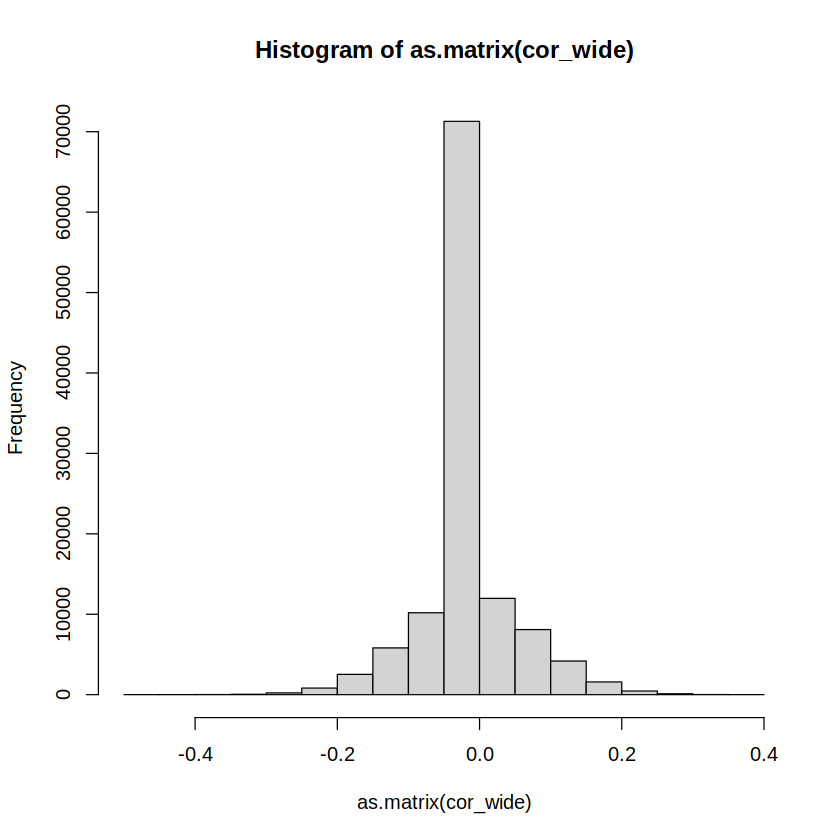

In [625]:
hist(as.matrix(cor_wide))
max(as.matrix(cor_wide))
min(as.matrix(cor_wide))

## Filter SFs and AS events

In [726]:
df_freq <- cor_long_all %>%
  group_by(SF, AS_Event) %>%
  summarise(Freq = length(patient)) %>%
  arrange(-Freq)

filter_sf <- unique((df_freq %>% filter(Freq %in% c(8, 7, 6, 5, 4)))$SF)
length(filter_sf)
filter_as <- unique((df_freq %>% filter(Freq %in% c(8, 7, 6, 5, 4)))$AS_Event)
length(filter_as)

filter_cor_wide <- cor_wide[filter_as, filter_sf]

`summarise()` has grouped output by 'SF'. You can override using the `.groups` argument.


[1] 41

[1] 207

In [727]:
summary(as.numeric(as.matrix(filter_cor_wide)))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.36241 -0.08944 -0.02668 -0.02106  0.04612  0.36826 

In [728]:
filter_cor_wide[filter_cor_wide > 0.3] <- 0.3
filter_cor_wide[filter_cor_wide < -0.3] <- -0.3

In [729]:
df_anno_col <- cor_long_all %>%
  group_by(SF) %>%
  summarise(freq_sf = n_distinct(patient)) %>%
  arrange(desc(freq_sf)) %>%
  filter(!duplicated(SF), SF %in% filter_sf) %>%
  tibble::column_to_rownames(var = "SF")
df_anno_col <- df_anno_col[colnames(filter_cor_wide), , drop = F]
df_anno_col$freq_sf <- as.character(df_anno_col$freq_sf)

df_anno_row <- cor_long_all %>%
  group_by(AS_Event) %>%
  summarise(freq_as = n_distinct(patient)) %>%
  arrange(desc(freq_as)) %>%
  filter(!duplicated(AS_Event), AS_Event %in% filter_as) %>%
  tibble::column_to_rownames(var = "AS_Event")
df_anno_row <- df_anno_row[rownames(filter_cor_wide), , drop = F]
df_anno_row$freq_as <- as.character(df_anno_row$freq_as)
df_anno_row$AS_type <- factor(
  as.character(sapply(strsplit(rownames(df_anno_row), split = ";|:"), function(x) {
    x[2]
  })),
  levels = AS_type
)

In [730]:
ann_colors <- list()
ann_colors[["freq_sf"]] <- colorRampPalette(c(
  "#fff7f3", "#fde0dd", "#fcc5c0", "#fa9fb5", "#f768a1", "#dd3497", "#ae017e", "#7a0177", "#49006a"
))(10)
names(ann_colors[["freq_sf"]]) <- c(1:10)
ann_colors[["freq_as"]] <- colorRampPalette(c(
  "#ffffe5", "#f7fcb9", "#d9f0a3", "#addd8e", "#78c679", "#41ab5d", "#238443", "#006837", "#004529"
))(10)
names(ann_colors[["freq_as"]]) <- c(1:10)
ann_colors[["AS_type"]] <- AS_color
names(ann_colors[["AS_type"]]) <- AS_type

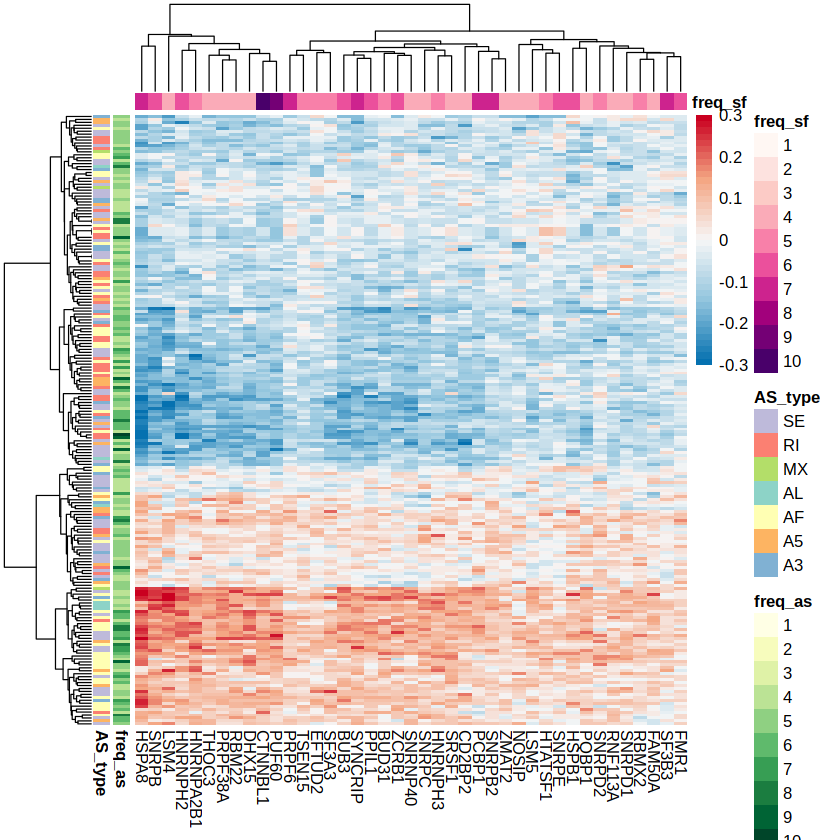

In [732]:
rg <- max(abs(filter_cor_wide))
p <- pheatmap(
  filter_cor_wide,
  show_colnames = T, show_rownames = F, border_color = "NA",
  color = colorRampPalette(rev(c("#ca0020", "#f4a582", "#f7f7f7", "#92c5de", "#0571b0")))(40),
  annotation_row = df_anno_row, annotation_col = df_anno_col, annotation_colors = ann_colors,
  # filename = 'test.pdf', width = 10, height = 10,
  # clustering_method = 'complete',cutree_rows = 2,breaks = seq(-rg, rg, length.out = 40)
)

In [734]:
ann_cluster <- cutree(p$tree_row, k = 2) %>%
  as.data.frame() %>%
  magrittr::set_colnames(c("cluster")) %>%
  mutate_at(c("cluster"), as.factor)
table(ann_cluster$cluster)
ann_cluster$AS <- sapply(
  strsplit(rownames(ann_cluster), split = ";|:"), function(x) {
    x[2]
  }
)
ann_cluster$gene <- sapply(
  strsplit(rownames(ann_cluster), split = ";|:"), function(x) {
    x[1]
  }
)
ann_cluster$event_id <- rownames(ann_cluster)

df_anno_row$cluster <- ann_cluster[rownames(df_anno_row), ]$cluster
ann_colors[["cluster"]] <- c("#74add1", "#f46d43") # c('#abd9e9','#74add1','#ffffbf','#f46d43')
names(ann_colors[["cluster"]]) <- c("1", "2")

pheatmap(
  filter_cor_wide,
  show_colnames = T, show_rownames = F, border_color = "NA",
  color = colorRampPalette(rev(c("#ca0020", "#f4a582", "#f7f7f7", "#92c5de", "#0571b0")))(40),
  annotation_row = df_anno_row, annotation_col = df_anno_col, annotation_colors = ann_colors,
  filename = "1_heatmap_cor_SF_AS.pdf", width = 8, height = 5,
  cutree_rows = 2, breaks = seq(-rg, rg, length.out = 40)
)


  1   2 
119  88 

In [667]:
pheatmap(
  filter_cor_wide,
  show_colnames = T, show_rownames = T, border_color = "NA",
  color = colorRampPalette(rev(c("#ca0020", "#f4a582", "#f7f7f7", "#92c5de", "#0571b0")))(40),
  annotation_row = df_anno_row, annotation_col = df_anno_col, annotation_colors = ann_colors,
  filename = "1_heatmap_cor_SF_AS_rowname.pdf", width = 15, height = 24,
  cutree_rows = 2, breaks = seq(-rg, rg, length.out = 40)
)


A3 A5 AF AL MX RI SE 
19 22 50  6  3 37 70 

Saving 6.67 x 2.5 in image


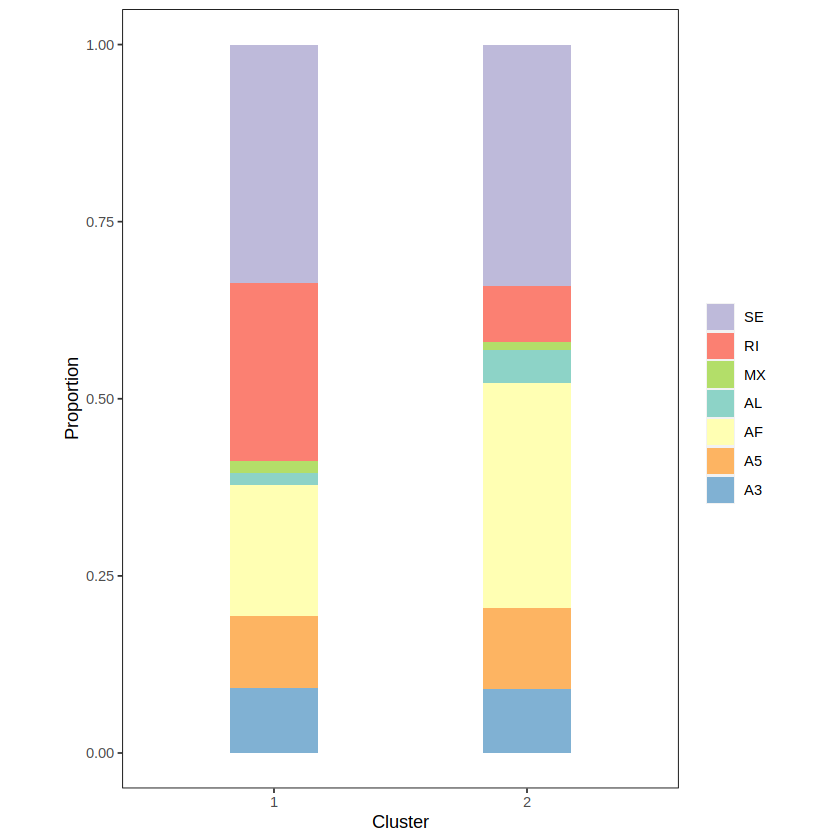

In [776]:
table(ann_cluster$AS)
as_freq <- as.data.frame(table(ann_cluster$AS, ann_cluster$cluster))
as_freq$Var2 <- factor(as.character(as_freq$Var2), levels = c("1", "2"))
as_freq$Var1 <- factor(as.character(as_freq$Var1), levels = AS_type)
ggplot(as_freq, aes(x = Var2, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity", position = "fill", width = 0.35) +
  mytheme +
  scale_fill_manual(values = AS_color) +
  labs(x = "Cluster", y = "Proportion") +
  theme(legend.title = element_blank(), aspect.ratio = 1.4)
ggsave(file = "1_heatmap_cor_SF_AS_barplot.pdf", height = 2.5)

In [777]:
table(ann_cluster$AS, ann_cluster$cluster)

    
      1  2
  A3 11  8
  A5 12 10
  AF 22 28
  AL  2  4
  MX  2  1
  RI 30  7
  SE 40 30

In [742]:
cluster1 <- c(A3 = 11, A5 = 12, AF = 22, AL = 2, MX = 2, RI = 30, SE = 40)
cluster2 <- c(A3 = 8, A5 = 10, AF = 28, AL = 4, MX = 1, RI = 7, SE = 30)
# RI
RI_cluster1 <- cluster1["RI"]
RI_cluster2 <- cluster2["RI"]
# Other AS events
non_RI_cluster1 <- sum(cluster1) - RI_cluster1
non_RI_cluster2 <- sum(cluster2) - RI_cluster2
# Contingency table
contingency_table <- matrix(
  c(RI_cluster1, RI_cluster2, non_RI_cluster1, non_RI_cluster2),
  nrow = 2, byrow = TRUE, dimnames = list(
    "RI" = c("Present", "Absent"), "Cluster" = c("Cluster 1", "Cluster 2")
  )
)
print("Contingency Table:")
print(contingency_table)
# Fisher's exact test
fisher_test <- fisher.test(contingency_table)
print("Fisher's Exact Test Result:")
print(fisher_test)

[1] "Contingency Table:"
         Cluster
RI        Cluster 1 Cluster 2
  Present        30         7
  Absent         89        81
[1] "Fisher's Exact Test Result:"

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.001571
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.558298 11.044760
sample estimates:
odds ratio 
  3.877273 

